In [1]:
import math
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

from res import set_default, show_scatterplot, plot_bases

In [2]:
set_default()

# Non-linearity functions

In [3]:
x_1d = torch.linspace(-10, 10, 1000)
x_2d = torch.randn(1000, 2)


In [4]:
colors = x_2d[:, 0]

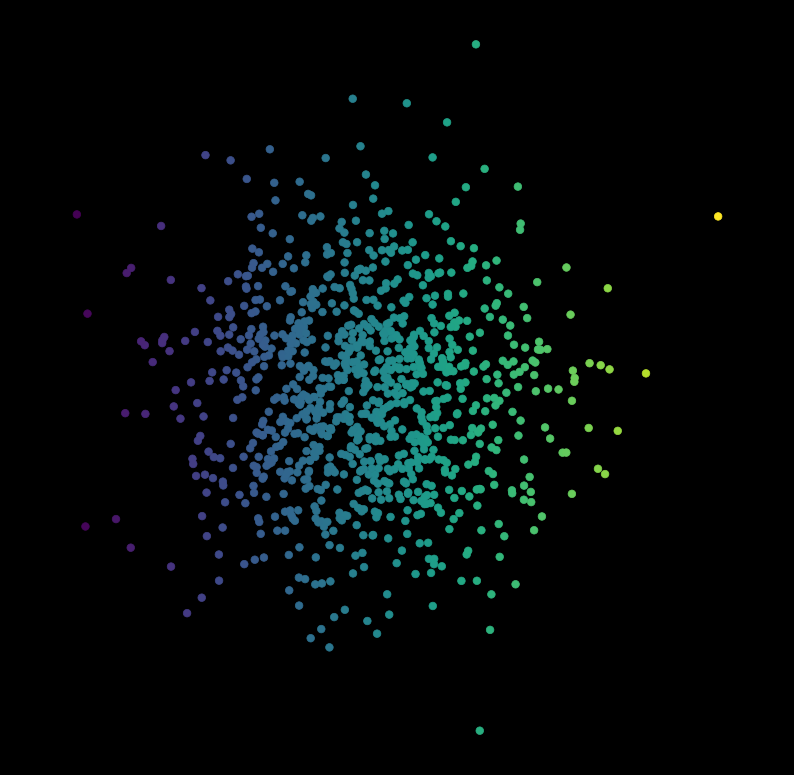

In [5]:
show_scatterplot(x_2d, colors=colors)

## 1. ReLU

In [27]:
torch.max(torch.tensor(0), torch.tensor([[-2,4], [-9, 3]]))

tensor([[0, 4],
        [0, 3]])

In [28]:
def my_relu(x: torch.Tensor) -> torch.Tensor:
    return torch.max(torch.tensor(0), x)

In [52]:
def my_relu_2(x: torch.Tensor) -> torch.Tensor:
    return torch.where(x > 0, x, 0)

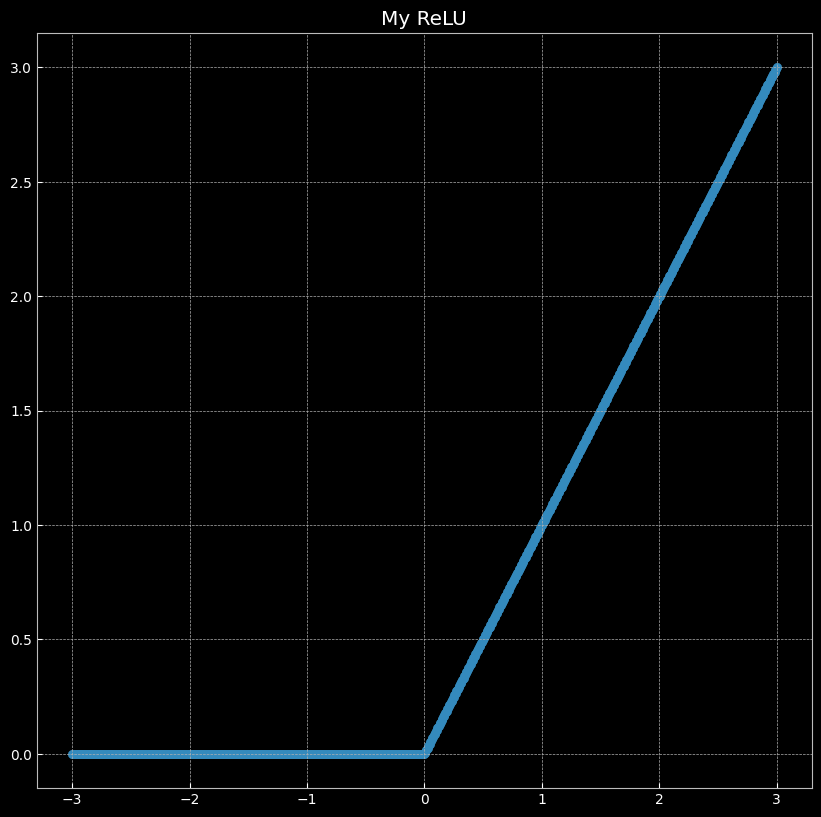

In [43]:
y = my_relu(x_1d)
plt.title("My ReLU")
plt.scatter(x_1d, y);

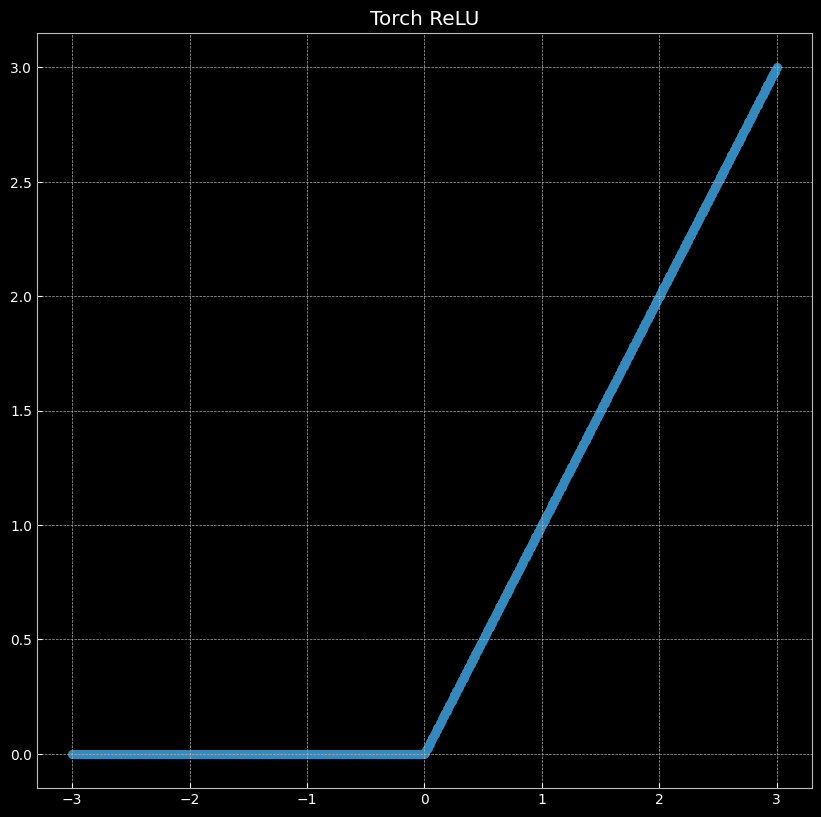

In [44]:
y = torch.relu(x_1d)
plt.title("Torch ReLU")
plt.scatter(x_1d, y);

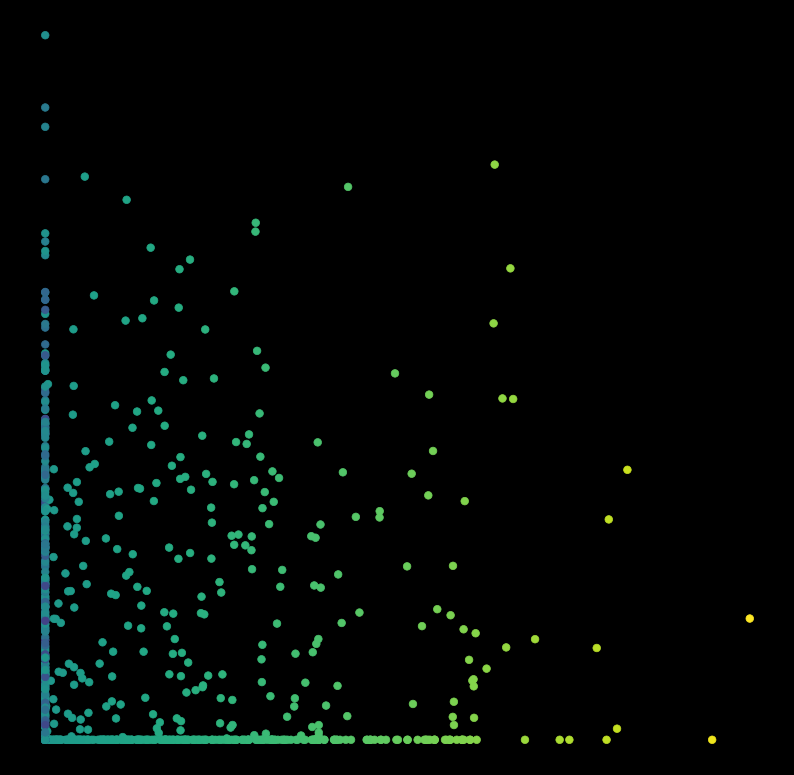

In [47]:
y = my_relu(x_2d)
show_scatterplot(y, colors=colors);


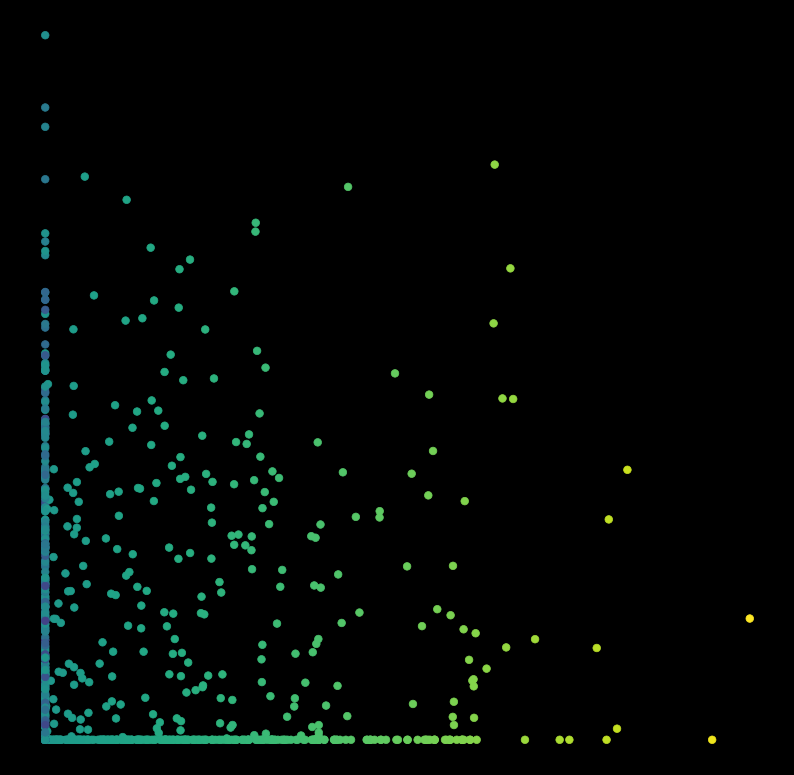

In [51]:
y = torch.relu(x_2d)
show_scatterplot(y, colors);

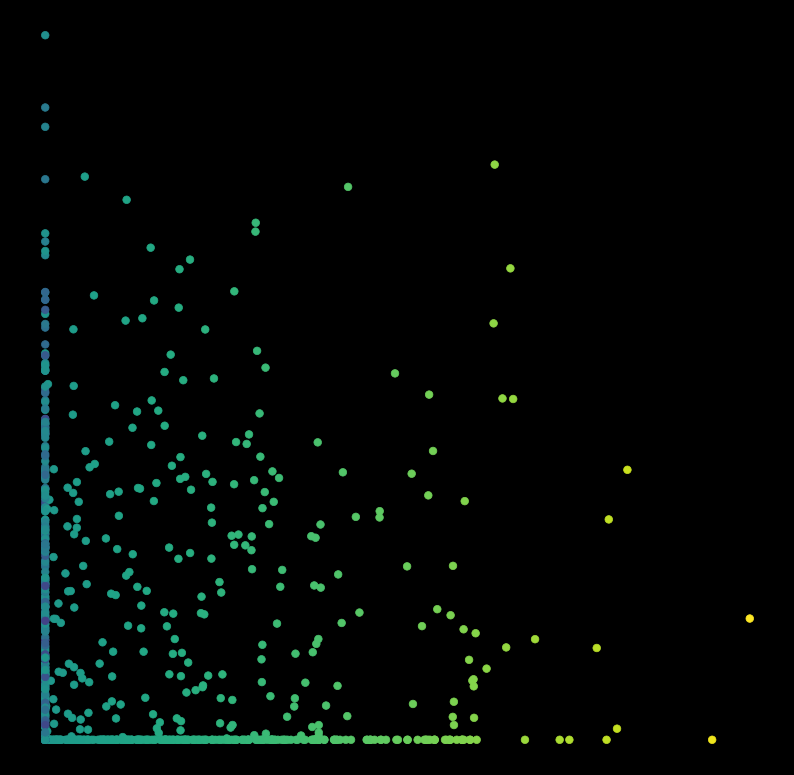

In [53]:
y = my_relu_2(x_2d)
show_scatterplot(y, colors)

In [93]:
class My_ReLU(nn.Module):
    def __init__(self, inplace: bool = False):
        super().__init__()
        self.inplace = inplace

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out = F.relu(x, inplace=self.inplace)
        return out  

    def extra_repr(self):
        inplace_str = "inplace=True" if self.inplace else ""
        return inplace_str

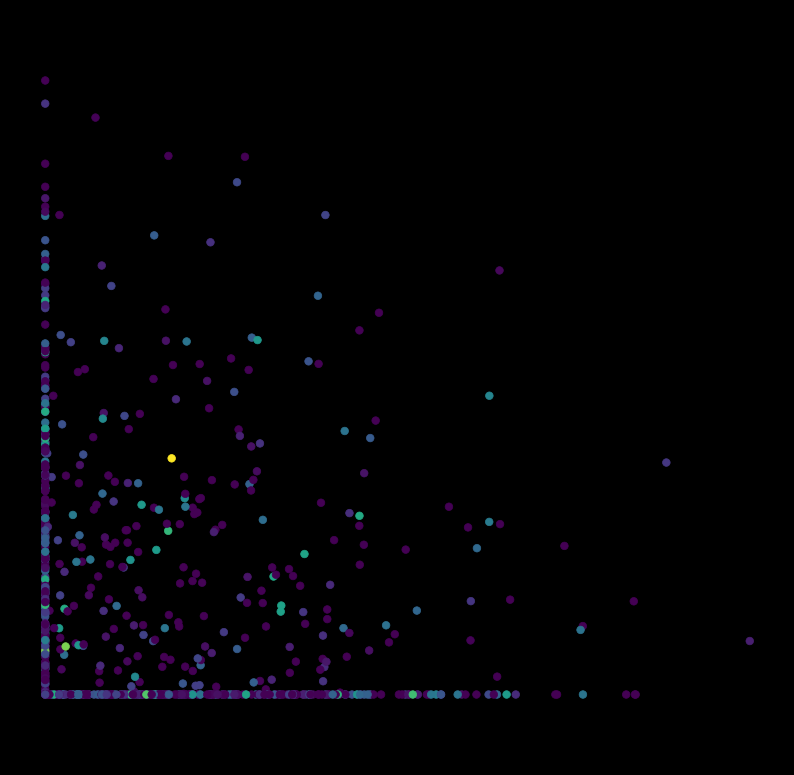

In [71]:
my_relu = My_ReLU()
y = my_relu(x_2d)
show_scatterplot(y, colors)


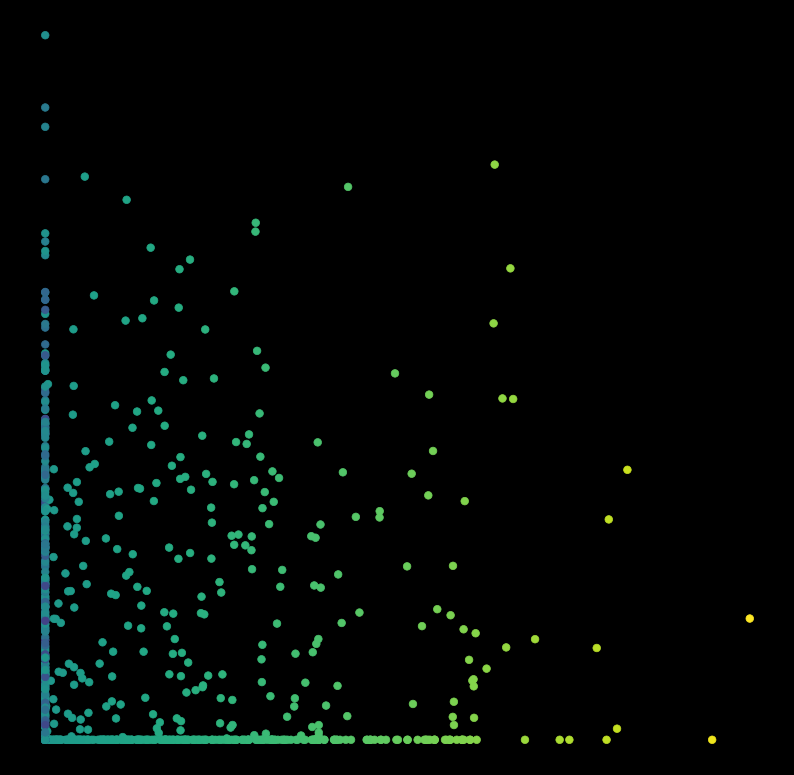

In [61]:
t_relu = nn.ReLU()
y = t_relu(x_2d)
show_scatterplot(y, colors)


In [91]:
nn.ReLU, nn.ReLU(inplace=True)

(torch.nn.modules.activation.ReLU, ReLU(inplace=True))

In [92]:
My_ReLU, My_ReLU(inplace=True)

(__main__.My_ReLU, My_ReLU(inplace=True))

In [94]:
class IMPL_ReLU(nn.Module):
    r"""Applies the rectified linear unit function element-wise:

    :math:`\text{ReLU}(x) = (x)^+ = \max(0, x)`

    Args:
        inplace: can optionally do the operation in-place. Default: ``False``

    Shape:
        - Input: :math:`(*)`, where :math:`*` means any number of dimensions.
        - Output: :math:`(*)`, same shape as the input.

    .. image:: ../scripts/activation_images/ReLU.png

    Examples::

        >>> m = nn.ReLU()
        >>> input = torch.randn(2)
        >>> output = m(input)


      An implementation of CReLU - https://arxiv.org/abs/1603.05201

        >>> m = nn.ReLU()
        >>> input = torch.randn(2).unsqueeze(0)
        >>> output = torch.cat((m(input),m(-input)))
    """
    __constants__ = ['inplace']
    inplace: bool

    def __init__(self, inplace: bool = False):
        super(IMPL_ReLU, self).__init__()
        self.inplace = inplace

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        return F.relu(input, inplace=self.inplace)

    def extra_repr(self) -> str:
        inplace_str = 'inplace=True' if self.inplace else ''
        return inplace_str

In [100]:
# I wonder why is "__main__", but ok
# https://stackoverflow.com/questions/48845989/understanding-class-type-main-classname
IMPL_ReLU

__main__.IMPL_ReLU

In [65]:
# pythorch c++ implementation
def relu_c_impl(x: torch.Tensor) -> torch.Tensor:
    return torch.clamp(x, min=0)

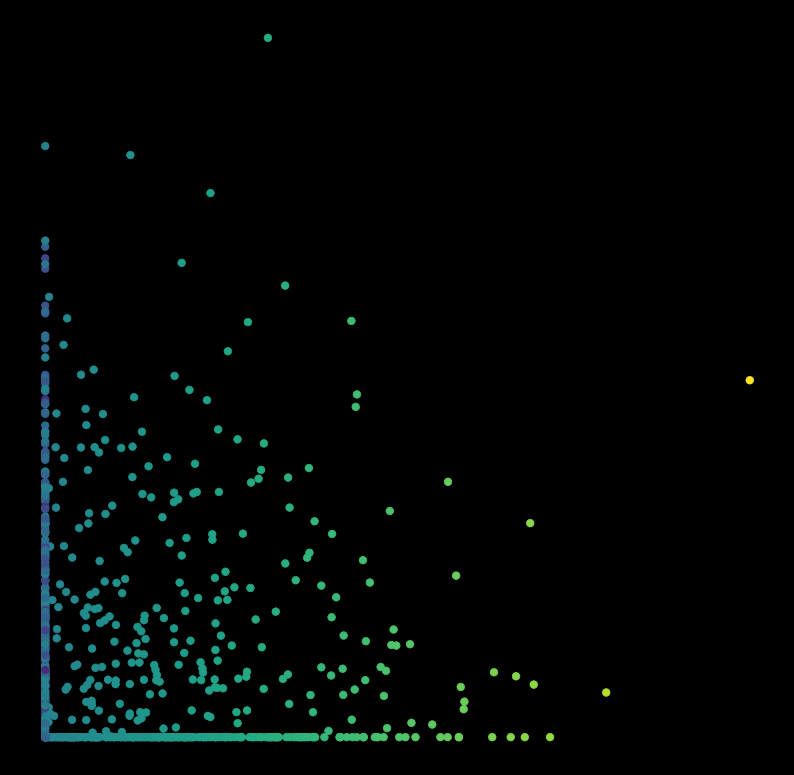

In [68]:
y = relu_c_impl(x_2d)
show_scatterplot(y, colors)

In [101]:
def relu_derivative(x: torch.Tensor) -> torch.Tensor:
    return torch.where(x>0, 1, 0)

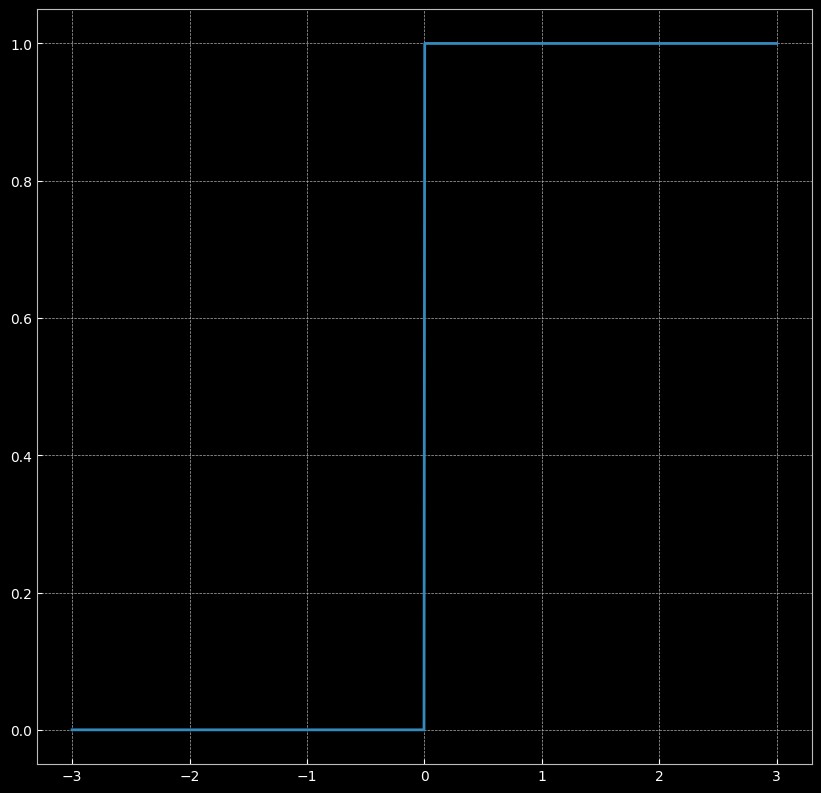

In [102]:
y_grad = relu_derivative(x_1d)
plt.plot(x_1d, y_grad)

## 2. Sigmoid

In [6]:
def my_sigmoid(x: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-x))

In [7]:
def my_sigmoid_full(x: torch.Tensor) -> torch.Tensor:
    x_pos = 1 / (1 + torch.exp(-x))
    x_neg = torch.exp(x) / (torch.exp(x) + 1)
    return torch.where(x > 0, x_pos, x_neg)

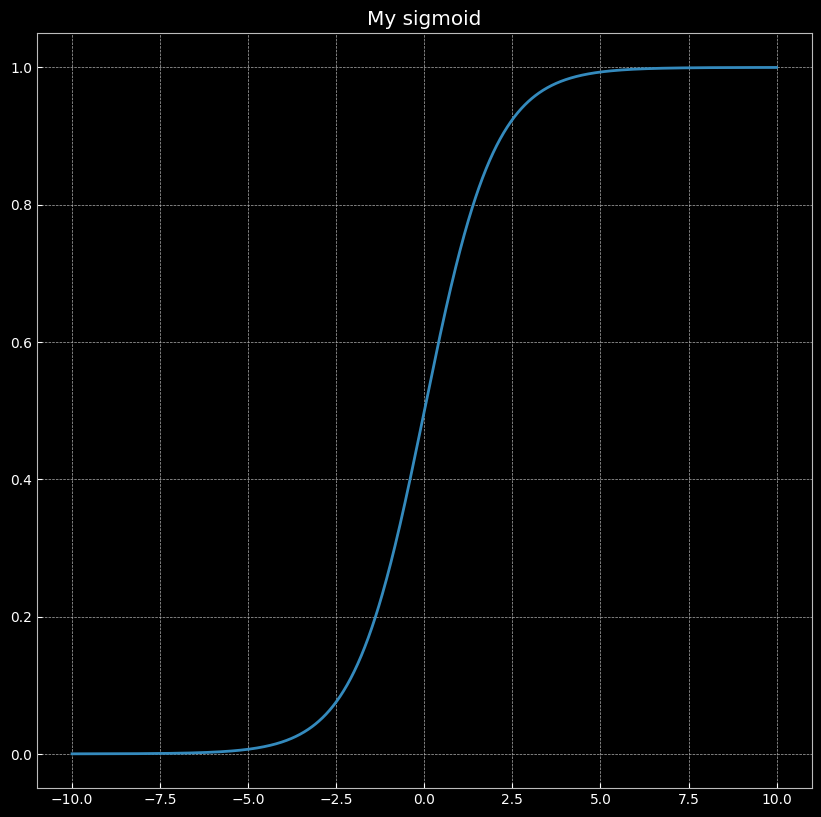

In [8]:
y = my_sigmoid(x_1d)
plt.title("My sigmoid")
plt.plot(x_1d, y);

#### Overflows

In [9]:
math.exp(1e6)

OverflowError: math range error

In [10]:
np.exp(1e6)

/tmp/ipykernel_4365/1257618566.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1e6)


inf

In [11]:
math.exp(-1e6)

0.0

In [12]:
np.exp(-1e6)

0.0

In [13]:
torch.exp(torch.tensor(1e6))

tensor(inf)

In [14]:
torch.exp(torch.tensor(-1e6))

tensor(0.)

In [24]:
x_large_pos = torch.linspace(-10, 1e6, 1000)
x_large_pos[-1]

tensor(1000000.)

In [25]:
y = torch.exp(x_large_pos)
y[-1]

tensor(inf)

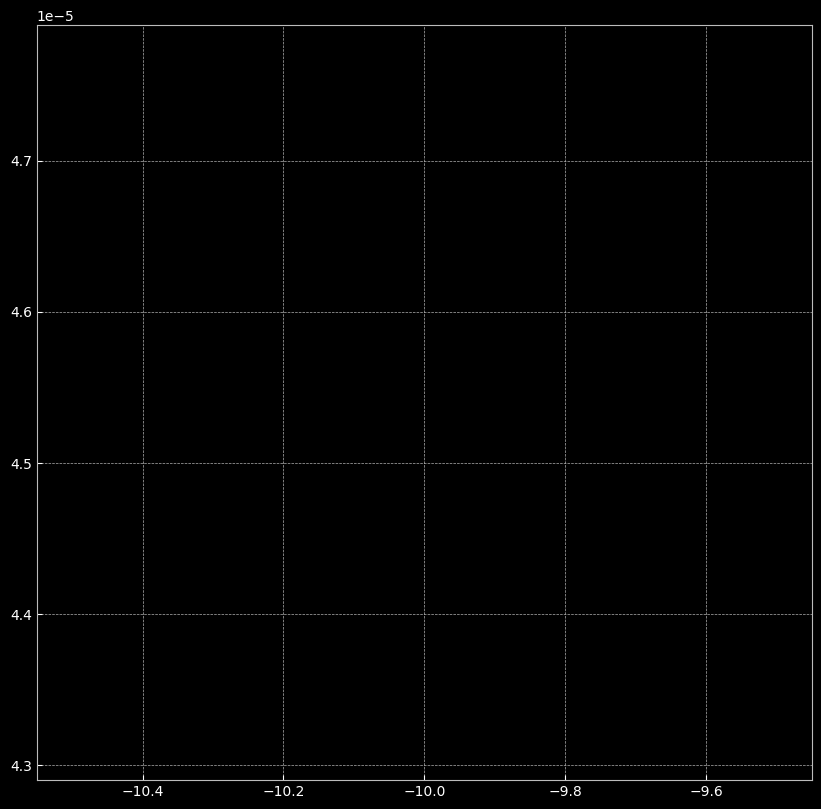

In [26]:
plt.plot(x_large_pos, y)

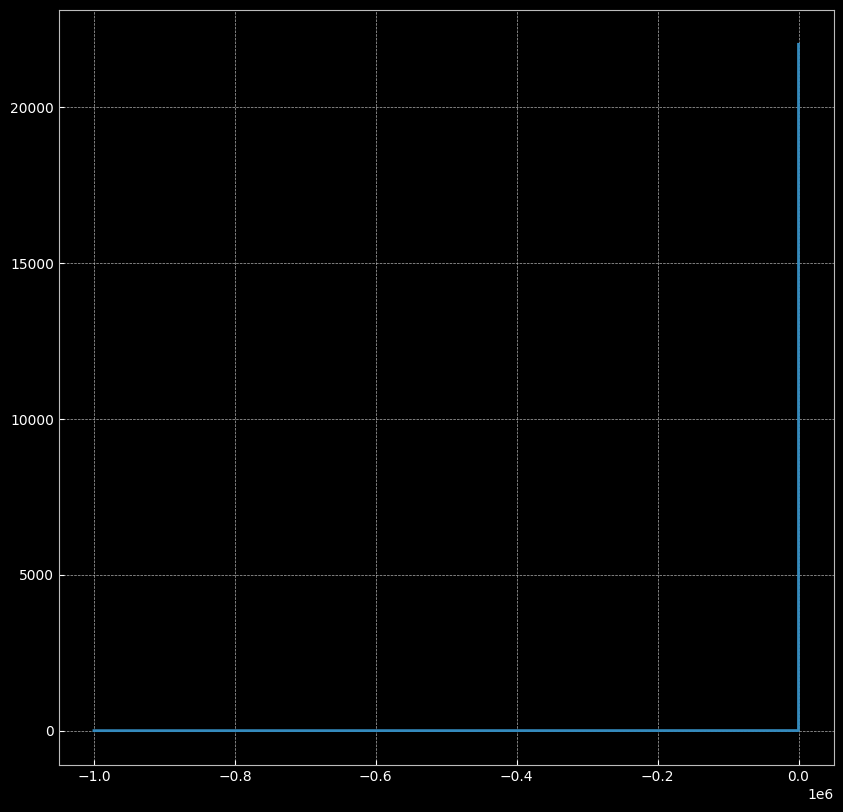

In [52]:
x_large_neg = torch.linspace(-1e6, 10, 1_000_000)
y = torch.exp(x_large_neg)
plt.plot(x_large_neg, y)

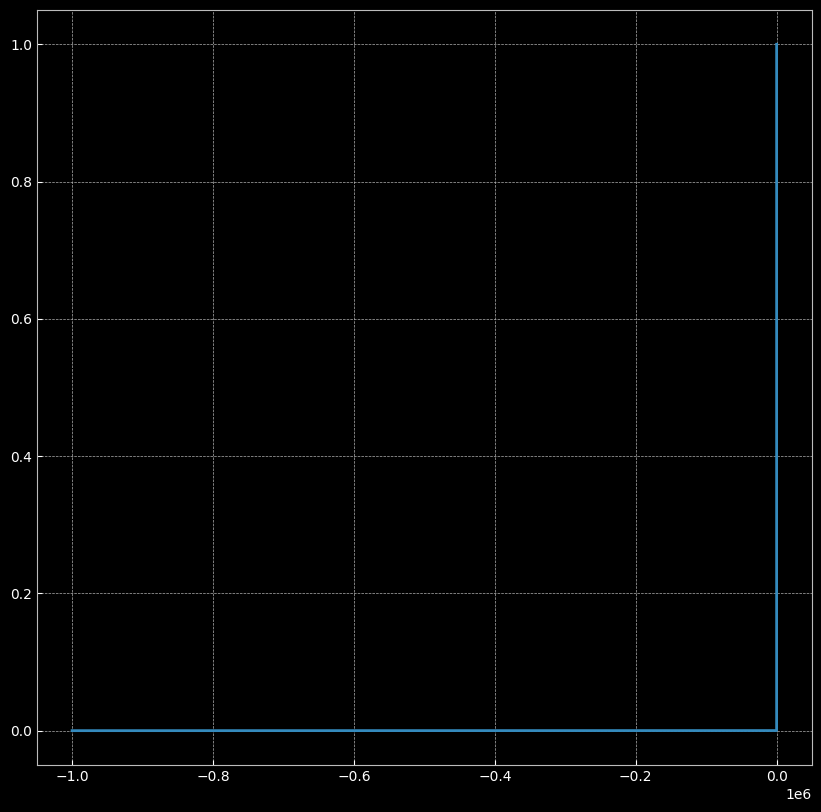

In [53]:
y_my = my_sigmoid(x_large_neg)
plt.plot(x_large_neg, y_my)

In [54]:
y_my

tensor([0.0000, 0.0000, 0.0000,  ..., 0.9997, 0.9999, 1.0000])

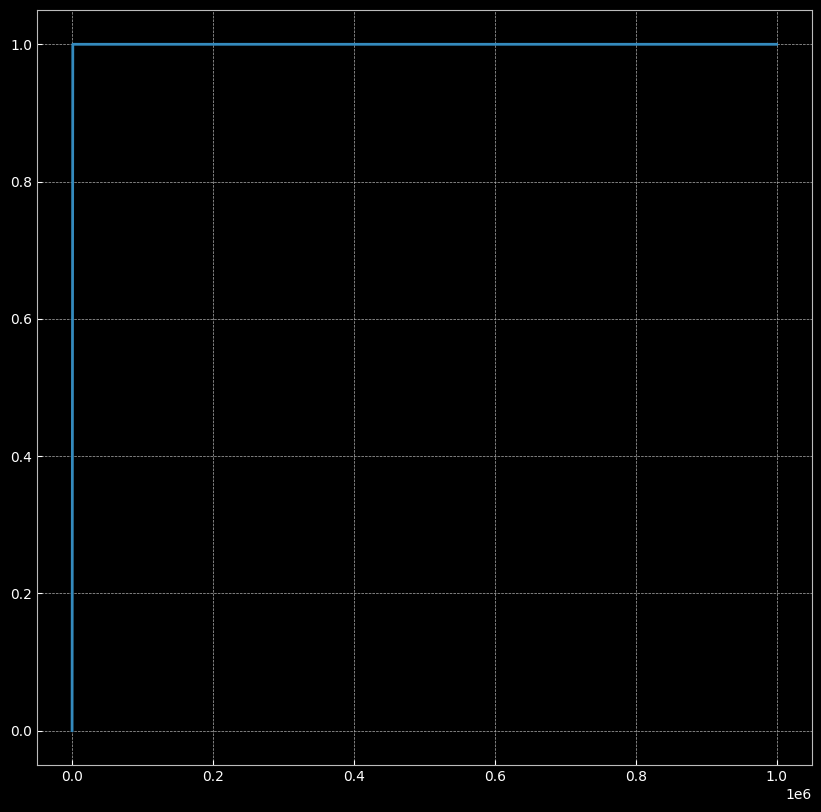

In [55]:
y_my = my_sigmoid(x_large_pos)
plt.plot(x_large_pos, y_my)

In [56]:
y_my

tensor([4.5398e-05, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+

##### How overflow doesn't happen

In [57]:
my_sigmoid(x_large_neg)

tensor([0.0000, 0.0000, 0.0000,  ..., 0.9997, 0.9999, 1.0000])

In [58]:
torch.exp(-x_large_neg)

tensor([       inf,        inf,        inf,  ..., 3.3547e-04, 1.2341e-04,
        4.5400e-05])

In [59]:
1 + torch.exp(-x_large_neg)

tensor([   inf,    inf,    inf,  ..., 1.0003, 1.0001, 1.0000])

In [60]:
1 / (1 + torch.exp(-x_large_neg))

tensor([0.0000, 0.0000, 0.0000,  ..., 0.9997, 0.9999, 1.0000])

In [61]:
my_sigmoid_full(x_large_neg)

tensor([0.0000, 0.0000, 0.0000,  ..., 0.9997, 0.9999, 1.0000])

In [62]:
torch.sigmoid(x_large_neg)

tensor([0.0000, 0.0000, 0.0000,  ..., 0.9997, 0.9999, 1.0000])

In [63]:
nn.Sigmoid()(x_large_neg)

tensor([0.0000, 0.0000, 0.0000,  ..., 0.9997, 0.9999, 1.0000])

In [64]:
torch.special.expit(x_large_neg)

tensor([0.0000, 0.0000, 0.0000,  ..., 0.9997, 0.9999, 1.0000])

## 3. Tanh